In [96]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.pyplot import figure



In [87]:
print("Loading full data")
full_data = pd.read_csv("data/processed_data/cleaned_v1.csv")

print("Loading model")
embeddings = torch.load('corpus_embeddings_bi_encoder.pt')

print(full_data.columns)

Loading full data
Loading model
Index(['id', 'country', 'name', 'NACE', 'description',
       'description_no_stopwords', 'description_no_stopwords_stemmed'],
      dtype='object')


In [88]:
def firmnav_id_toIndex(firmnav_id):
    return full_data.index[full_data['id'] == firmnav_id].tolist()

def firmnav_index_toEmbedding(firmnav_index):
    return embeddings[firmnav_index]

def firmnav_idArray_toIndexArray(idArray):
    newArray = [firmnav_id_toIndex(id) for id in idArray]
    return newArray

def decrease_array_depth(array):
    newArray = []
    for item in array:
        if not item == []:
            newArray += [item[0]]
    return newArray


In [112]:
#positive_init_ids = test_example.loc[test_example['Rating'] == 1.0].loc[test_example['AI search'] == 'Initial']['Firmnav ID']
#positive_result_ids = test_example.loc[test_example['Rating'] == 1.0][test_example['AI search'].isna()]['Firmnav ID']
#negative_result_ids = test_example.loc[test_example['Rating'] == 0.0][test_example['AI search'].isna()]['Firmnav ID']

#init_index = firmnav_idArray_toIndexArray(positive_init_ids)
#init_index = decrease_array_depth(init_index)

#positive_index = firmnav_idArray_toIndexArray(positive_result_ids)
#positive_index = decrease_array_depth(positive_index)

#negative_index = firmnav_idArray_toIndexArray(negative_result_ids)
#negative_index = decrease_array_depth(negative_index)



def getIndexArrays(file_path, separator=';'):
    df = pd.read_csv(file_path, sep=separator)

    pos_init = df.loc[df['Rating'] == 1.0].loc[df['AI search'] == 'Initial']['Firmnav ID']
    pos_res = df.loc[df['Rating'] == 1.0][df['AI search'].isna()]['Firmnav ID']
    neg_res = df.loc[df['Rating'] == 0.0][df['AI search'].isna()]['Firmnav ID']

    init_i = decrease_array_depth(firmnav_idArray_toIndexArray(pos_init))
    pos_i = decrease_array_depth(firmnav_idArray_toIndexArray(pos_res))
    neg_i = decrease_array_depth(firmnav_idArray_toIndexArray(neg_res))

    return init_i, pos_i, neg_i

init_index, positive_index, negative_index = getIndexArrays('data/train/Consulting.csv')

#print(init_index)
#print(positive_index)
#print(negative_index)

<ipython-input-112-2ff6e5b7e245>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pos_res = df.loc[df['Rating'] == 1.0][df['AI search'].isna()]['Firmnav ID']
<ipython-input-112-2ff6e5b7e245>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  neg_res = df.loc[df['Rating'] == 0.0][df['AI search'].isna()]['Firmnav ID']


[57993, 57994, 57995, 57996, 57997]
[57999, 58000, 27064, 58001, 58002, 57823, 58004, 58005, 58007, 58010, 58011, 58012, 58013, 58015, 58016, 58017, 58019, 58022, 58023, 57648, 58024, 57722, 58081, 58045, 58061, 57692, 58055, 57735, 58083, 58080, 57732, 58084, 58086, 58087, 58088, 58065, 58090, 58029, 58092, 58093, 58094]
[58008, 57708, 58009, 49692, 58014, 58018, 58020, 58021, 17946, 58025, 57710, 58082, 47615, 58089, 50081]


In [113]:
principal_components_k = 50

pca_model = PCA(n_components=principal_components_k)
principal_components_train = pca_model.fit_transform(embeddings)
transposed = np.array(principal_components_train).T
explained_variance = pca_model.explained_variance_ratio_

summ = explained_variance.sum()
cumsum = 0
total_var_explained = np.zeros(principal_components_k)
for i in range(principal_components_k):
    cumsum = cumsum + explained_variance[i]
    total_var_explained[i]=(cumsum/summ)




1.0


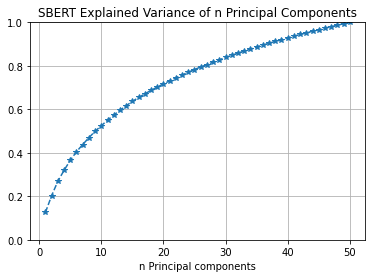

In [114]:
total_var_explained_trainPCA = np.array(total_var_explained)

print(total_var_explained[principal_components_k-1])
plt.plot(range(1,principal_components_k+1),total_var_explained,"--*")
plt.grid();
plt.title('SBERT Explained Variance of n Principal Components')
plt.xlabel('n Principal components')
plt.axis((None,None,0,1))
plt.show();

/Users/philiphelsted/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


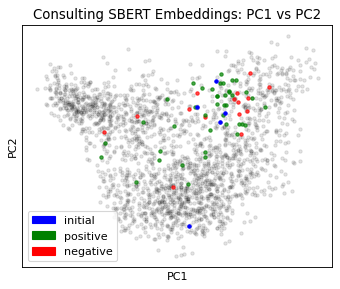

In [121]:
pop_a = mpatches.Patch(color='blue', label='initial')
pop_b = mpatches.Patch(color='green', label='positive')
pop_c = mpatches.Patch(color='red', label='negative')

figure(figsize=(5, 4), dpi=80)

for x, y in zip(transposed[0,:2000], transposed[1,:2000]):
    plt.plot(x,y,".", color='black', alpha=0.1)

for x, y in zip(transposed[0,negative_index], transposed[1,negative_index]):
    plt.plot(x,y,".", color='red', alpha=0.7)

for x, y in zip(transposed[0,positive_index], transposed[1,positive_index]):
    plt.plot(x,y,".", color='green', alpha=0.7)

for x, y in zip(transposed[0,init_index], transposed[1,init_index]):
    plt.plot(x,y,".", color='blue', alpha=1)





plt.legend(handles=[pop_a,pop_b, pop_c])
plt.title("Consulting SBERT Embeddings: PC1 vs PC2")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xticks([], [])
plt.yticks([], [])
plt.show()

In [120]:
print(len(full_data["description"]))
print(len(embeddings))

60122
60122
